# Plotly and Cufflinks

Plotly is a library for interactive visualizations and dashboards for webs. Cufflinks connects Plotly with pandas.

Installation through `pip` (`conda` not available yet):
```python
    pip/3 install plotly
    pip/3 install cufflinks
    pip/3 install chart-studio
    pip/3 install jupyterlab "ipywidgets>=7.5"
    jupyter labextension install jupyterlab-plotly@4.14.3
    jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3
```

I had to shut down Jupyter (`ps -ef | grep jup -> kill`) and open it again.

Plotly is open source but it's also a company which makes money by hosting dashboards and visualizations.

In [12]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf

In [13]:
# Check plotly version > 1.9
plotly.__version__

'4.14.3'

In [14]:
# Import plotly-offline modules
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [15]:
# Connect Javascript to our notebook - this is for notebook development
init_notebook_mode(connected=True)

In [16]:
# In order to work offline through cufflinks, we need to run this:
cf.go_offline()

In [17]:
# DATA
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [18]:
df.head()

,A,B,C,D
0,0.322639,0.344071,1.346294,-1.157620
1,1.433298,-0.535171,0.170190,0.633926
2,-1.543460,-0.895144,1.112898,0.735421
3,0.460491,0.307682,1.187527,1.451854
4,2.269745,0.884374,-0.654111,-0.934434


In [19]:
df2 = pd.DataFrame({'Category':['A', 'B', 'C'],'Values':[32,43,50]})

In [20]:
df2

,Category,Values
0,A,32
1,B,43
2,C,50


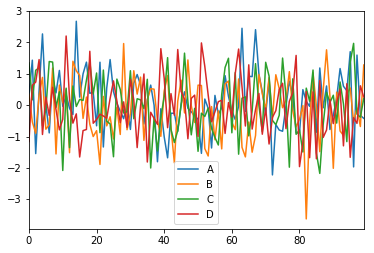

In [21]:
# Regular pandas plots can be done with .plot()
df.plot()

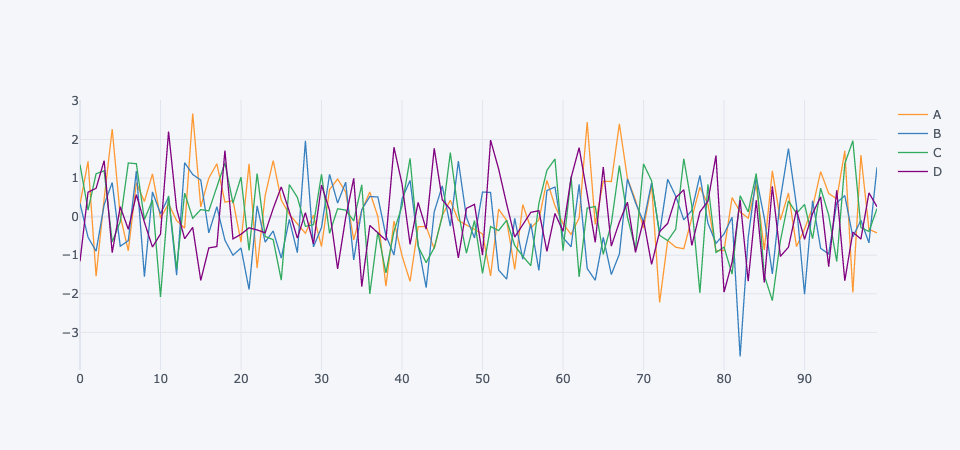

In [23]:
# To plot with plotly, we just need to execute .iplot(), that's it!
# When we hoover on the diagram, we see we can:
# - zoom (in/out/home)
# - export image as PNG
# - highlight closest data, spike lines, etc.
# - Click ON/OFF data!
df.iplot()

In [24]:
# Other types of plots we can render
# - Scatterplots
# - Bar plots (often with aggregated functions)
# - Box plots
# - 3d surface plots
# - Histograms (of one column or several)
# - Spread plots
# - Bubble plots: scatter plot with point sizes given by another column
# - Scatter matrix = sns.pairplot()

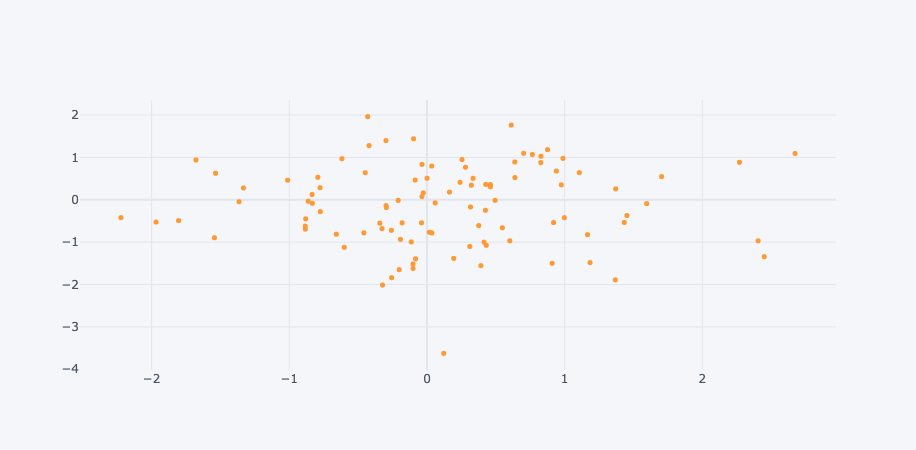

In [29]:
# Scatterplot
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=5) # mode='markers' is necessary to avoid connecting points

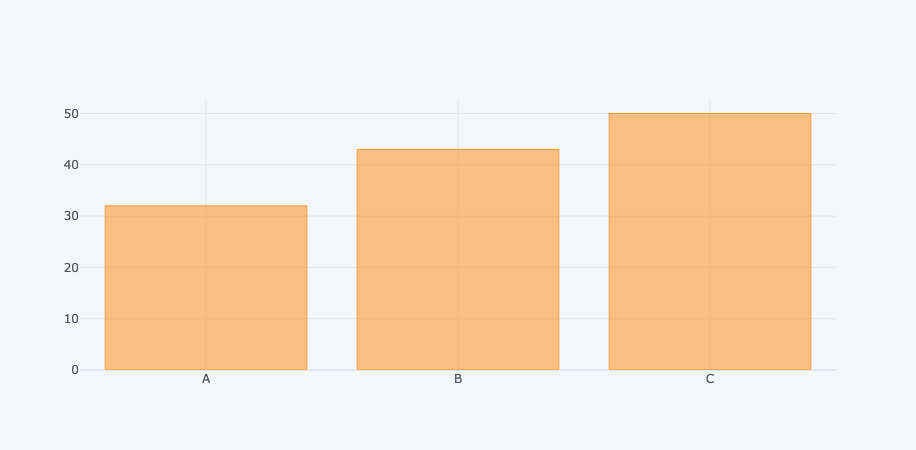

In [32]:
# Bar plot
df2.iplot(kind='bar',x='Category',y='Values')

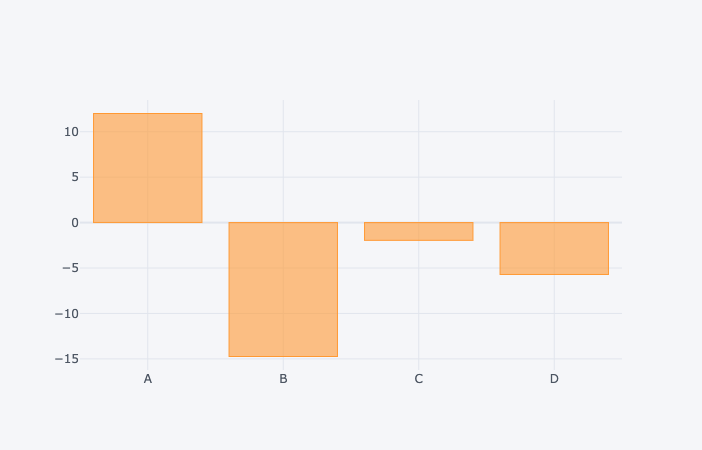

In [34]:
# Bar plots are interesting with aggregate functions of groupbys
df.sum().iplot(kind='bar')

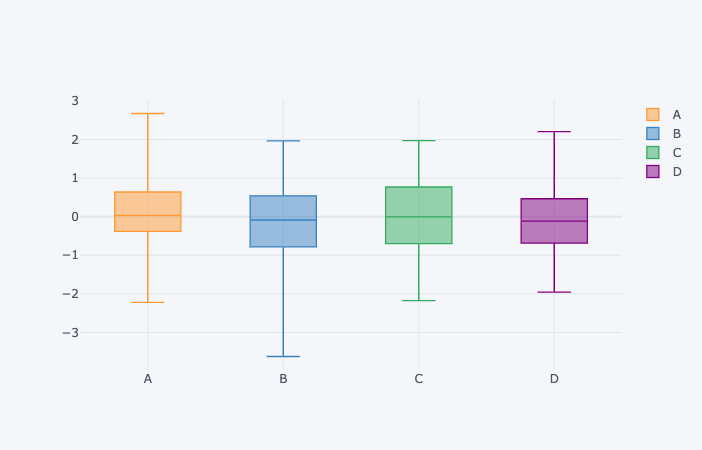

In [35]:
# Box plots
df.iplot(kind='box')

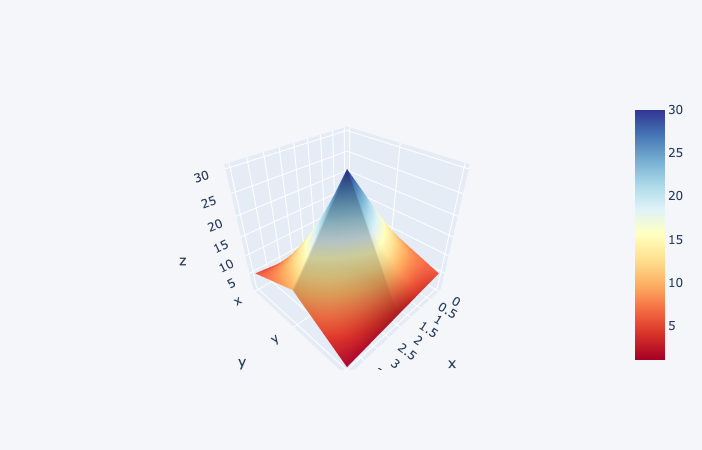

In [36]:
# 3D surface plots
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3.iplot(kind='surface',colorscale='rdylbu') # look at the plotly docs for colorscales

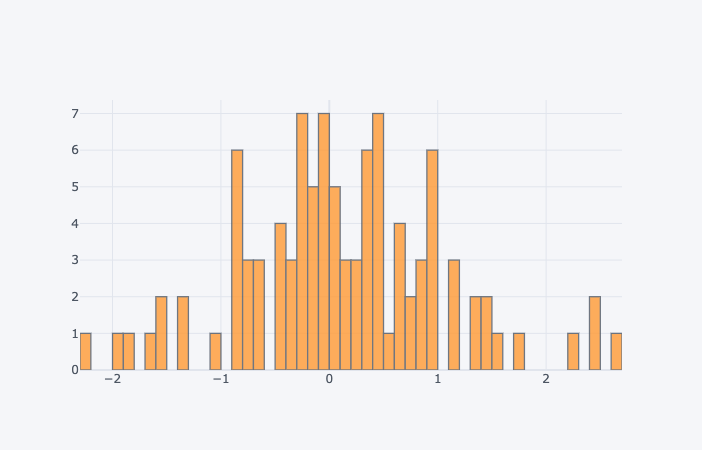

In [39]:
# Histograms
df['A'].iplot(kind='hist',bins=50)

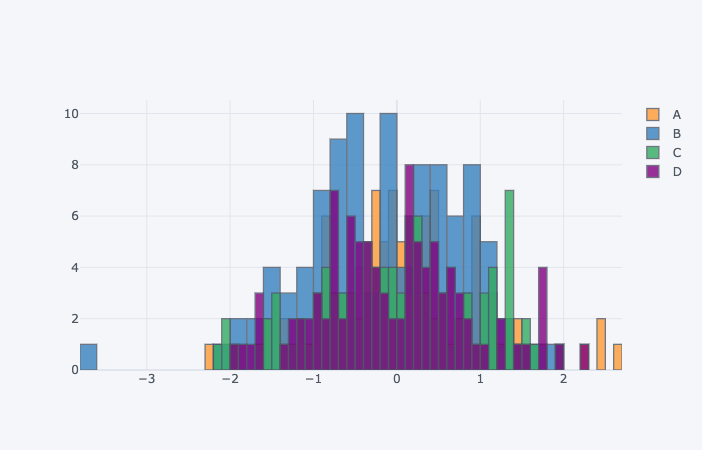

In [40]:
# Histograms of each column overlaped
df.iplot(kind='hist',bins=50)

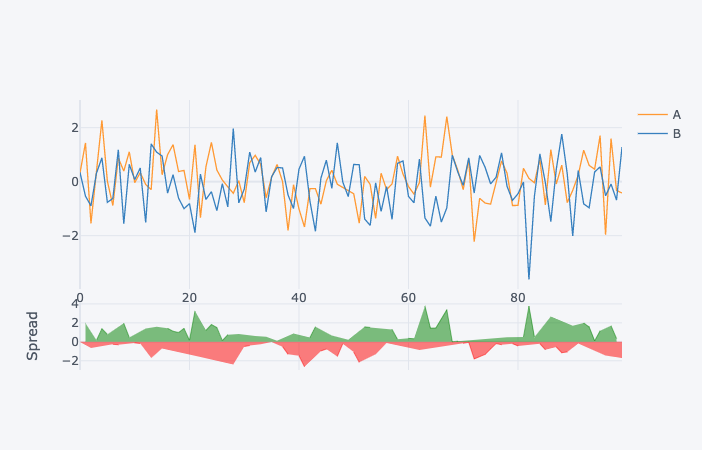

In [41]:
# Spread plots (common in finance)
df[['A','B']].iplot(kind='spread')

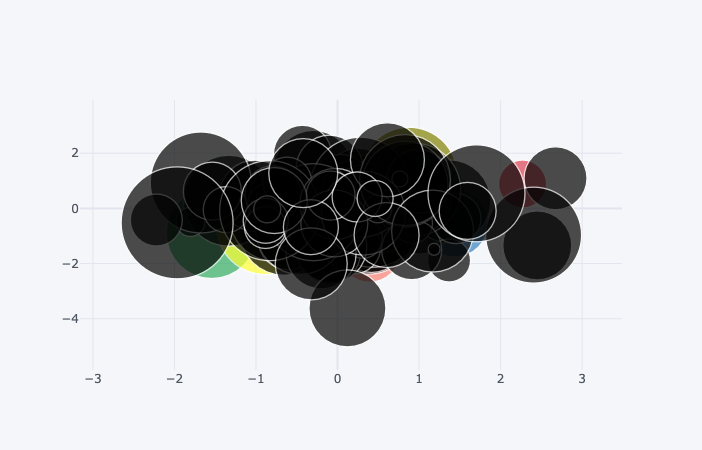

In [42]:
# Bubble plots: scatter plot with point sizes given by another column
df.iplot(kind='bubble',x='A',y='B',size='C')

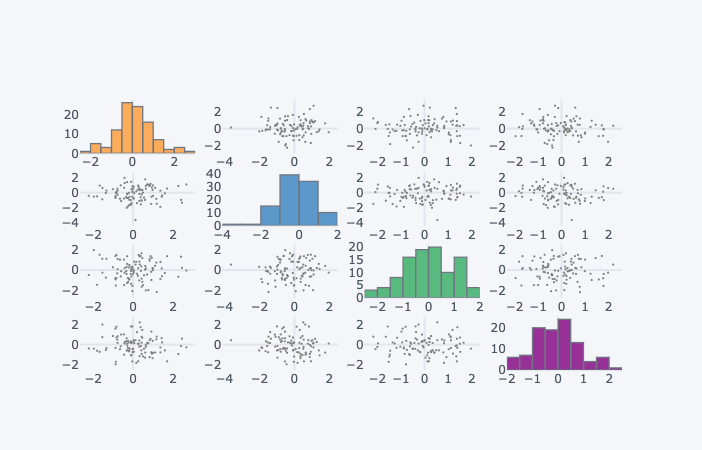

In [43]:
# Scatter matrix = sns.pairplot() = scatter plots of all pairs
# All columns need to be numerical
df.scatter_matrix()

## Choropleths and Geographical Plotting

Matplotlib has `basemap` for geographical plotting, but we're going to use `plotly`, which has interactive plotting capabilities (while `basemap` produces static plots).

We use `choropleth` maps, which have a difficult and weird syntax:
- Cheat sheet [here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf).
- Plotly reference link: https://plotly.com/python/reference/

Basically, we need to create a `data` dictionary/object and a `layout`dictionary/object; and the, create the map with `go.Figure()` and plot it with `iplot()`.

**IMPORTANT** the dataframe tables we load must be in plotly-conform format (e.g., state names, etc.).

Choropleth is a technical term which means 'many regions'. Note that plotly has only a reduced set of choropleths: USA-states, world, etc. If we want smaller locations within a country, we could create the JSON defining them and then the import the JSON to our script with plotly. See https://geojson.io/

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objs as go

In [47]:
# Import plotly-offline modules
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [49]:
# Connect Javascript to our notebook - this is for notebook development
init_notebook_mode(connected=True)

In [63]:
# We create a data dictionary using dict()
# We need the key-value pairs as defined
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'], # list of states/locations of locationmode
            locationmode = 'USA-states', # look in the docu for other possibilities
            colorscale = 'Jet', # Look in the docu for more options
            text = ['text1','text2','text3'], # text to show for each location
            z = [10.0,2.0,3.0], # data of each location: locations colored with data
            colorbar = {'title':'Colorbar Title'})

In [64]:
# Layout variable: nested dictionary
layout = dict(geo = {'scope':'usa'})

In [67]:
# We create the choropleth map with the two objects we created: (1) data and (2) layout
# the dictionary is weirdly passed in a list
choromap = go.Figure(data = [data],layout = layout)

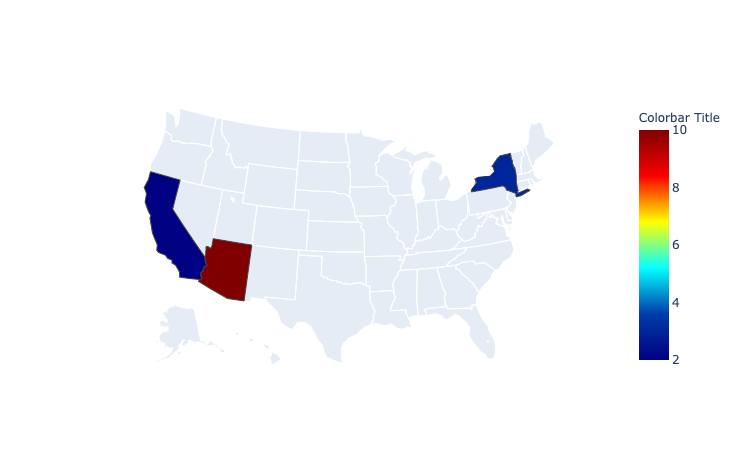

In [66]:
# Plot
iplot(choromap)

In [70]:
# If we execute plot() instead of iplot()
# A new HTML file is created and opened in the browser - we can save it
plot(choromap)

'temp-plot.html'

### Maps with real data

In [71]:
# Load data
# IMPORTANT: table must be in plotly-conform format...
df = pd.read_csv('data/2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [73]:
# We create a data dictionary using dict()
data = dict(type = 'choropleth',
            locations = df['code'],
            locationmode = 'USA-states', # look in the docu for other possibilities
            colorscale= 'ylorrd', # yellow-orange-red
            text = df['text'], # text to show for each location
            z = df['total exports'], # all columns shown when hoovering, total exports used for color
            marker = dict(line = dict(color = 'rgb(255,255,255)',width=2)), # plotly notation, line between states
            colorbar = {'title':'Millions USD'}
           )

In [74]:
# We create the layout dictionary again in plotly (weird) format
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)') # grab a color tuple from the Internet
             )

In [75]:
# We create the choropleth map with the two objects we created: (1) data and (2) layout
choromap = go.Figure(data = [data],layout = layout)

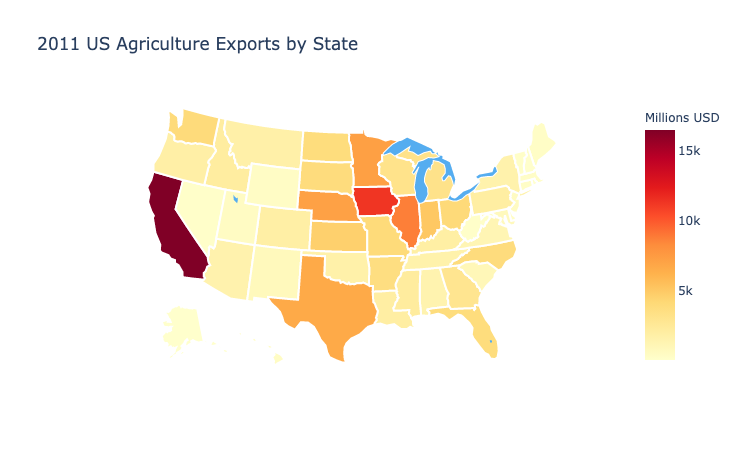

In [76]:
# Plot
iplot(choromap)

### World maps

In [77]:
# Load data
# IMPORTANT: table must be in plotly-conform format...
df = pd.read_csv('data/2014_World_GDP')

In [78]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [83]:
# Choropleth data dictionary
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [90]:
# Choropleth layout dictionary
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'} # mercator, ... look at the docu
    )
)

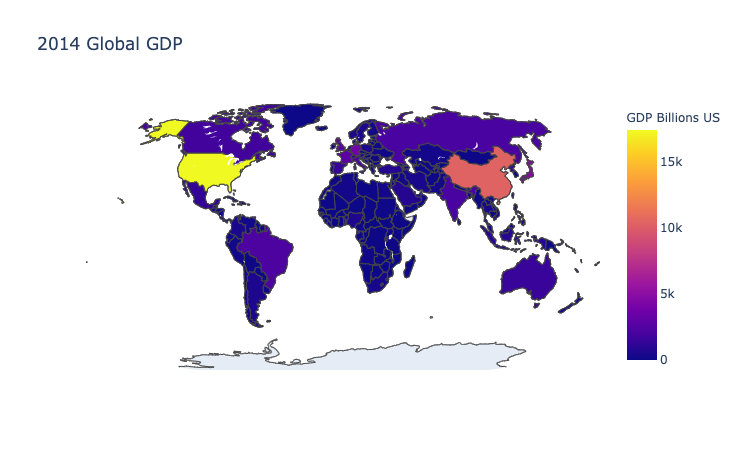

In [91]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)